# **TASK_2** - *Prediction Using Unsupervised ML*
### **Problem Statement** - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# ***K-Means***
The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found.The number of clusters found from data by the method is denoted by the letter 'K' in K-means.It is also known as the 'flat clustering algorithm'.

***IMPORTING*** ***REQUIRED LIBRARIES***

In [ ]:
# Firstly, we will start Importing Libraries. 
import numpy as np          #numpy used for working with arrays
import matplotlib.pyplot as plt      #matplotlib used for creating interactive visualizations 
import pandas as pd          #pandas used for analyzing the data
from sklearn import datasets   #sklearn used for machine learning tasks
import seaborn as sns         #seaborn used for making statistical graphs 

# Now, we will start loading the 'iris' dataset.
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head())    #It will print the first 5 rows of the dataset. 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


***TO DETERMINE THE OPTIMUM NUMBER OF CLUSTERS USING THE 'ELBOW METHOD'***

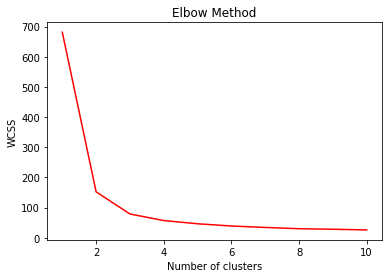

In [ ]:
# To find the optimum number of clusters for 'k-means' classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   
# We will plot the result into a line graph so that we can observe the Elbow 
plt.plot(range(1, 11), wcss, color="red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

*CONCLUSION - THE OPTIMUM NUMBER OF CLUSTERS IS 3.*

***TO CREATE THE K-MEANS CLASSIFIER***


In [ ]:
# We will apply 'k-means' to the dataset and then will create the k-means classifier. 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### ***TO PLOT THE CLUSTERS***

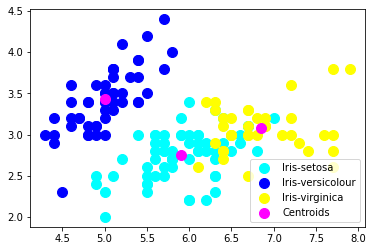

In [ ]:
#To Visualize The Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')
#We will plot the 'centroids' of the 'cluster'.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'magenta', label = 'Centroids')
plt.legend()